In [25]:

import catboost as cb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('/home/andrews-tang/Datasets/ILS_dataset.xlsx')
df.head()

,ANGLE,DDM_T1,DDM_T2,SDM_T1,SDM_T2,DDM_T1_std,DDM_T2_std,SDM_T1_std,SDM_T2_std,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,35.0,33.22,32.30,40.04,39.77,35.13,33.62,40.03,39.77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30.0,26.87,26.44,40.08,39.92,26.93,26.79,40.04,39.93,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.0,22.69,24.38,40.11,40.09,22.85,24.09,40.01,40.12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20.0,28.45,27.77,40.07,39.96,28.25,27.52,40.03,39.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,38.10,34.03,40.04,39.71,38.03,34.20,40.06,39.69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['ANGLE', 'DDM_T1', 'DDM_T2', 'SDM_T1', 'SDM_T2', 'DDM_T1_std',
       'DDM_T2_std', 'SDM_T1_std', 'SDM_T2_std', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [4]:
columns_to_remove = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 
                     'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 
                     'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 
                     'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 
                     'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 
                     'Unnamed: 24']

columns_to_remove

['Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24']

In [5]:
df.drop(columns=columns_to_remove, axis=1, inplace=True)

In [6]:
df.head(10)

,ANGLE,DDM_T1,DDM_T2,SDM_T1,SDM_T2,DDM_T1_std,DDM_T2_std,SDM_T1_std,SDM_T2_std
0,35.0,33.22,32.30,40.04,39.77,35.13,33.62,40.03,39.77
1,30.0,26.87,26.44,40.08,39.92,26.93,26.79,40.04,39.93
2,25.0,22.69,24.38,40.11,40.09,22.85,24.09,40.01,40.12
3,20.0,28.45,27.77,40.07,39.96,28.25,27.52,40.03,39.94
4,15.0,38.10,34.03,40.04,39.71,38.03,34.20,40.06,39.69
5,10.0,39.97,41.64,44.26,39.46,39.81,39.38,43.85,41.45
6,5.0,28.84,28.45,40.01,39.91,28.31,27.90,39.58,39.50
7,4.0,21.43,21.30,40.05,39.99,20.92,21.03,39.73,39.66
8,3.0,14.72,14.82,40.09,40.03,13.94,14.22,39.84,39.80
9,2.0,9.02,9.12,40.10,40.05,8.40,8.38,39.93,39.90


In [7]:
df['DDM_T1_diff'] = df['DDM_T1'] - df['DDM_T1_std']
df['DDM_T2_diff'] = df['DDM_T2'] - df['DDM_T2_std']
df['SDM_T1_diff'] = df['SDM_T1'] - df['SDM_T1_std']
df['SDM_T2_diff'] = df['SDM_T2'] - df['SDM_T2_std']

In [8]:
df.head(10)

,ANGLE,DDM_T1,DDM_T2,SDM_T1,SDM_T2,DDM_T1_std,DDM_T2_std,SDM_T1_std,SDM_T2_std,DDM_T1_diff,DDM_T2_diff,SDM_T1_diff,SDM_T2_diff
0,35.0,33.22,32.30,40.04,39.77,35.13,33.62,40.03,39.77,-1.91,-1.32,0.01,0.00
1,30.0,26.87,26.44,40.08,39.92,26.93,26.79,40.04,39.93,-0.06,-0.35,0.04,-0.01
2,25.0,22.69,24.38,40.11,40.09,22.85,24.09,40.01,40.12,-0.16,0.29,0.10,-0.03
3,20.0,28.45,27.77,40.07,39.96,28.25,27.52,40.03,39.94,0.20,0.25,0.04,0.02
4,15.0,38.10,34.03,40.04,39.71,38.03,34.20,40.06,39.69,0.07,-0.17,-0.02,0.02
5,10.0,39.97,41.64,44.26,39.46,39.81,39.38,43.85,41.45,0.16,2.26,0.41,-1.99
6,5.0,28.84,28.45,40.01,39.91,28.31,27.90,39.58,39.50,0.53,0.55,0.43,0.41
7,4.0,21.43,21.30,40.05,39.99,20.92,21.03,39.73,39.66,0.51,0.27,0.32,0.33
8,3.0,14.72,14.82,40.09,40.03,13.94,14.22,39.84,39.80,0.78,0.60,0.25,0.23
9,2.0,9.02,9.12,40.10,40.05,8.40,8.38,39.93,39.90,0.62,0.74,0.17,0.15


In [13]:
df_ddm_t1 = df[['ANGLE','DDM_T1','DDM_T1_std','DDM_T1_diff']]
df_ddm_t2 = df[['ANGLE','DDM_T2','DDM_T2_std','DDM_T2_diff']]

df_sdm_t1 = df[['ANGLE','SDM_T1','SDM_T1_std','SDM_T1_diff']]
df_sdm_t2 = df[['ANGLE','SDM_T2','SDM_T2_std','SDM_T2_diff']]

In [15]:
df_ddm_t1.head(20)

,ANGLE,DDM_T1,DDM_T1_std,DDM_T1_diff
0,35.0,33.22,35.13,-1.91
1,30.0,26.87,26.93,-0.06
2,25.0,22.69,22.85,-0.16
3,20.0,28.45,28.25,0.20
4,15.0,38.10,38.03,0.07
5,10.0,39.97,39.81,0.16
6,5.0,28.84,28.31,0.53
7,4.0,21.43,20.92,0.51
8,3.0,14.72,13.94,0.78
9,2.0,9.02,8.40,0.62


In [16]:
corr_matrix = df_ddm_t1[['ANGLE', 'DDM_T1', 'DDM_T1_std','DDM_T1_diff']].corr()
corr_matrix

,ANGLE,DDM_T1,DDM_T1_std,DDM_T1_diff
ANGLE,1.000000,0.811128,0.819999,-0.371266
DDM_T1,0.811128,1.000000,0.997690,-0.269959
DDM_T1_std,0.819999,0.997690,1.000000,-0.334750
DDM_T1_diff,-0.371266,-0.269959,-0.334750,1.000000


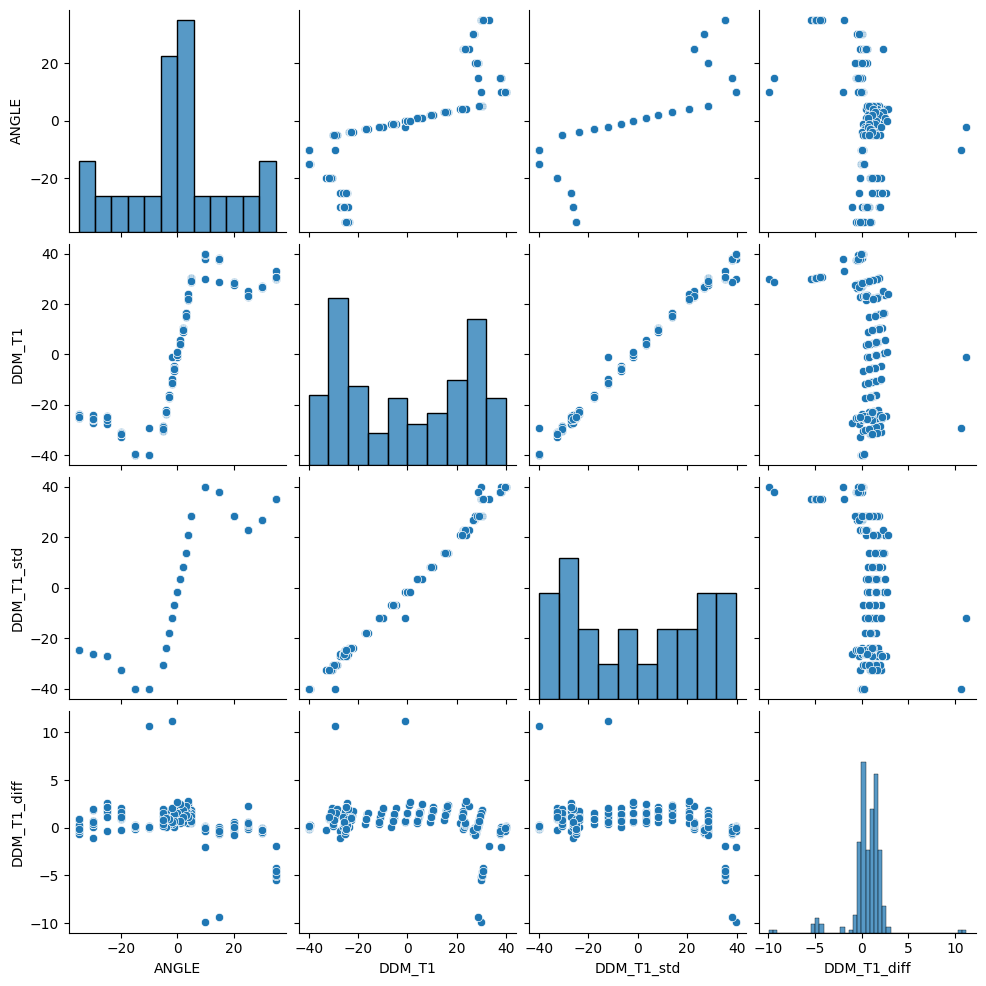

In [18]:
sns.pairplot(df_ddm_t1)

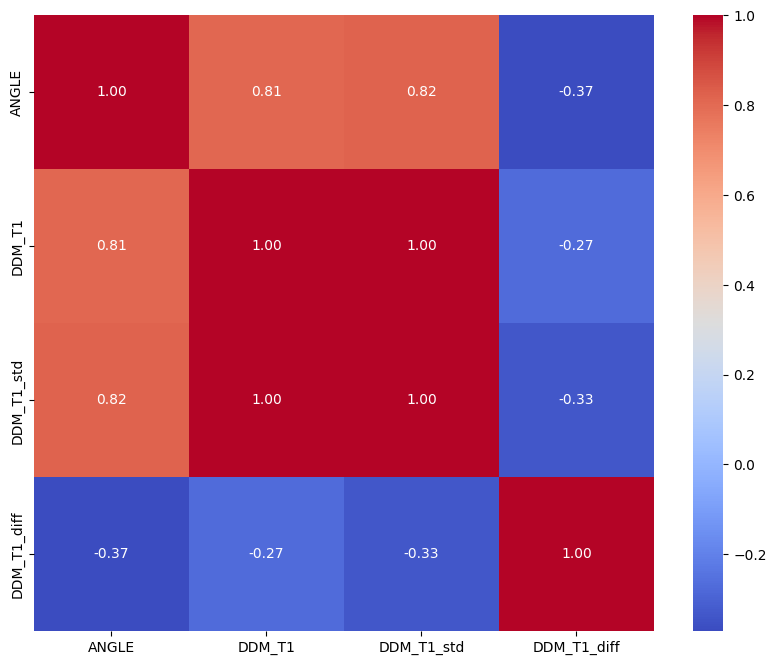

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_ddm_t1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

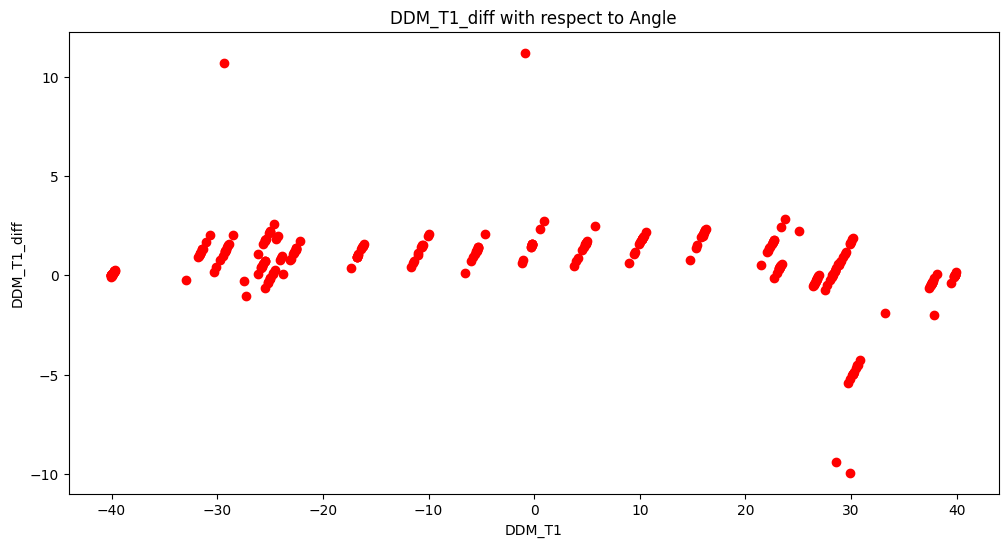

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(df['DDM_T1'], df['DDM_T1_diff'], color='r')
plt.xlabel('DDM_T1')
plt.ylabel('DDM_T1_diff')
plt.title('DDM_T1_diff with respect to Angle')
plt.show()

In [37]:
df_ddm_t1['ANGLE'] = df['ANGLE'].astype('category').cat.codes

X = df_ddm_t1.drop('DDM_T1_diff', axis=1)
y = df_ddm_t1['DDM_T1_diff']

/tmp/ipykernel_74618/2538751399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ddm_t1['ANGLE'] = df['ANGLE'].astype('category').cat.codes


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train

,ANGLE,DDM_T1,DDM_T1_std
258,17,39.77,39.81
232,20,25.10,22.85
33,12,4.89,3.28
157,3,-31.82,-32.72
148,12,4.89,3.28
...,...,...,...
188,18,28.62,38.03
71,20,23.22,22.85
106,8,-16.37,-17.71
270,5,-40.01,-40.03


In [73]:
model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42
)

In [74]:
categorical_features_indices = [df_ddm_t1.columns.get_loc('ANGLE')]

In [75]:
model.fit(X_train, y_train, cat_features=[X_train.columns.get_loc('ANGLE')], eval_set=(X_test, y_test), verbose=100)

0:	learn: 1.9450084	test: 1.0428866	best: 1.0428866 (0)	total: 2.03ms	remaining: 2.03s
100:	learn: 0.8469253	test: 0.6031433	best: 0.6031433 (100)	total: 165ms	remaining: 1.47s
200:	learn: 0.5773303	test: 0.5527329	best: 0.5527329 (200)	total: 264ms	remaining: 1.05s
300:	learn: 0.4472092	test: 0.5034850	best: 0.5034850 (300)	total: 369ms	remaining: 856ms
400:	learn: 0.3606668	test: 0.4711074	best: 0.4711074 (400)	total: 490ms	remaining: 732ms
500:	learn: 0.3068561	test: 0.4498298	best: 0.4498298 (500)	total: 602ms	remaining: 600ms
600:	learn: 0.2702570	test: 0.4338937	best: 0.4338937 (600)	total: 716ms	remaining: 475ms
700:	learn: 0.2430321	test: 0.4229168	best: 0.4228308 (696)	total: 840ms	remaining: 358ms
800:	learn: 0.2227274	test: 0.4099322	best: 0.4095645 (786)	total: 974ms	remaining: 242ms
900:	learn: 0.2033299	test: 0.3946002	best: 0.3938514 (898)	total: 1.05s	remaining: 116ms
999:	learn: 0.1887374	test: 0.3911539	best: 0.3908872 (985)	total: 1.15s	remaining: 0us

bestTest = 0.3

In [76]:
predictions = model.predict(X_test)

In [77]:
predictions

array([ 1.56303957,  1.32278718,  1.43678583,  1.43678583,  1.32278718,
       -0.05816077,  1.56689254,  1.33327539, -0.20015972, -0.1367827 ,
        1.27081617,  0.50854085,  2.19680708,  1.0786222 ,  1.27980172,
       -0.38637235,  1.19740006,  1.27980172,  1.16217199,  1.32278718,
        0.08574048, -0.48654116,  1.08802837, -0.13372935,  1.65290723,
        0.07680554,  0.15477601,  1.08802837,  1.10970183,  0.1308132 ,
       -0.12219787,  0.50854085, -0.18781766, -0.12047922,  1.27980172,
        0.66341898, -0.18781766, -0.33146385,  0.66341898,  0.82576292,
       -4.48347669,  1.59744512,  2.47096717,  0.1791354 , -0.22163534,
        0.82576292,  1.01312385, -0.04023878,  1.51728434,  2.33225267,
       -0.04023878,  0.77709222,  0.52604255,  1.13545853,  1.52975237,
        1.27081617])

In [79]:
results = pd.DataFrame([predictions, y_test]).transpose().rename(columns={0: 'Predictions', 1: 'y_test'})
results.head(10)

,Predictions,y_test
0,1.563040,1.75
1,1.322787,1.82
2,1.436786,2.06
3,1.436786,1.40
4,1.322787,1.80
5,-0.058161,-0.16
6,1.566893,1.82
7,1.333275,1.31
8,-0.200160,-0.27
9,-0.136783,0.01


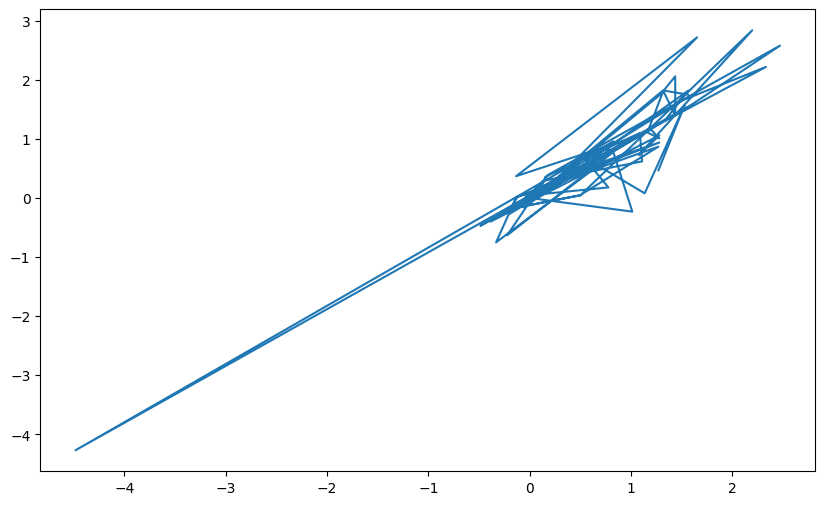

In [81]:
plt.figure(figsize=(10,6))

plt.plot(results['Predictions'], results['y_test'])